In [7]:
import pandas as pd
import polaris as po
import seaborn as sns
import yellowbrick
import rdkit.Chem as Chem
from admet_ai import ADMETModel
import numpy as np
import datamol as dm
import matplotlib.pyplot as plt

In [8]:
model = ADMETModel()
predictors = ['BBB_Martins', 
              'Bioavailability_Ma',
 'CYP1A2_Veith',
 'CYP2C19_Veith',
 'CYP2C9_Substrate_CarbonMangels',
 'CYP2C9_Veith',
 'CYP2D6_Substrate_CarbonMangels',
 'CYP2D6_Veith',
 'CYP3A4_Substrate_CarbonMangels',
 'CYP3A4_Veith',
  'PAMPA_NCATS',
 'Pgp_Broccatelli',
 'Caco2_Wang',
 'Clearance_Hepatocyte_AZ',
 'Clearance_Microsome_AZ',
 'Half_Life_Obach',
 'HydrationFreeEnergy_FreeSolv',
'Lipophilicity_AstraZeneca',
 'PPBR_AZ',
 'Solubility_AqSolDB',
 'VDss_Lombardo',
]


/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=la

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

/Users/robertarbon/mamba/envs/polaris/lib/python3.12/site-packages/chemprop/utils.py:418: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.b

### Add in predictors from ADMET AI

In [9]:
ds_path = 'train_admet_all'


df = pd.read_csv(f'../data/{ds_path}.csv')
train_ix = np.load('../data/train_split2_idx.npy')
df.loc[:, 'split'] = ['train' if x else 'val' for x in df.index.isin(train_ix)]



df.loc[:, 'SMILES'] = df['CXSMILES'].apply(lambda x: Chem.MolToSmiles(Chem.MolFromSmiles(x)))
preds = model.predict(smiles=df.SMILES.values)
df_all = pd.concat([df, preds.loc[:, predictors].reset_index(drop=True)], axis=1)

RDKit fingerprints:   0%|          | 0/434 [00:00<?, ?it/s]<frozen importlib._bootstrap>:488: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterHierarchyMatcher> already registered; second conversion method ignored.
<frozen importlib._bootstrap>:488: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterHierarchyMatcher> already registered; second conversion method ignored.
<frozen importlib._bootstrap>:488: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterHierarchyMatcher> already registered; second conversion method ignored.
<frozen importlib._bootstrap>:488: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterHierarchyMatcher> already registered; second conversion method ignored.
<frozen importlib._bootstrap>:488: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterHierarchyMatcher> already registered; second conversion method ignored.
<frozen importlib._bootstrap>:488: RuntimeWarning: 

In [11]:
preds.columns

Index(['molecular_weight', 'logP', 'hydrogen_bond_acceptors',
       'hydrogen_bond_donors', 'Lipinski', 'QED', 'stereo_centers', 'tpsa',
       'AMES', 'BBB_Martins', 'Bioavailability_Ma', 'CYP1A2_Veith',
       'CYP2C19_Veith', 'CYP2C9_Substrate_CarbonMangels', 'CYP2C9_Veith',
       'CYP2D6_Substrate_CarbonMangels', 'CYP2D6_Veith',
       'CYP3A4_Substrate_CarbonMangels', 'CYP3A4_Veith', 'Carcinogens_Lagunin',
       'ClinTox', 'DILI', 'HIA_Hou', 'NR-AR-LBD', 'NR-AR', 'NR-AhR',
       'NR-Aromatase', 'NR-ER-LBD', 'NR-ER', 'NR-PPAR-gamma', 'PAMPA_NCATS',
       'Pgp_Broccatelli', 'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53',
       'Skin_Reaction', 'hERG', 'Caco2_Wang', 'Clearance_Hepatocyte_AZ',
       'Clearance_Microsome_AZ', 'Half_Life_Obach',
       'HydrationFreeEnergy_FreeSolv', 'LD50_Zhu', 'Lipophilicity_AstraZeneca',
       'PPBR_AZ', 'Solubility_AqSolDB', 'VDss_Lombardo',
       'molecular_weight_drugbank_approved_percentile',
       'logP_drugbank_approved_percentile

In [12]:
df_all.rename(mapper=lambda x: x.replace(' ', '.').replace('-', '.'), axis=1, inplace=True)
df_all.loc[:, ['Molecule.Name', 'split'] + predictors].to_csv('train_admet_chemprop.csv', index=False)

### Add in 2D Features from RDKIT

In [5]:
def _preprocess(i, row):

    dm.disable_rdkit_log()

    mol = dm.to_mol(row['CXSMILES'], ordered=True)
    mol = dm.fix_mol(mol)
    mol = dm.sanitize_mol(mol, sanifix=True, charge_neutral=False)
    mol = dm.standardize_mol(
        mol, disconnect_metals=False, normalize=True, reionize=True, uncharge=False, stereo=True
    )
    feats = dm.descriptors.compute_many_descriptors(mol)
    feats['Molecule Name'] = row['Molecule Name']
    return feats
    

feats = dm.parallelized(_preprocess, df_all.iterrows(),arg_type="args", progress=True, total=len(df))
feats = pd.DataFrame(feats)

df_all = pd.merge(left=df_all, right=feats, on='Molecule Name')
df_all.shape



100%|██████████| 434/434 [00:05<00:00, 82.52it/s] 


(434, 63)

##  Scale Training targets

In [6]:
epsilon = 1e-8
for col in ['MLM', 'HLM', 'KSOL', 'MDR1-MDCKII']: 
    df_all.loc[:, f"Log{col}"] = np.log10(np.clip(df_all[col], a_min=epsilon, a_max=None))

target_cols = list(df_all.filter(regex='^Log').columns)
df_all.shape

(434, 67)

## Feature selection

In [7]:
# Need to cluster the targets because of the floor ceiling effects

In [8]:
from sklearn.neighbors import KernelDensity
from scipy.signal import argrelextrema


def kde_clustering(a, bw_frac_silverman = 0.1): 
    not_nan = ~np.isnan(a.flatten())
    a = a.flatten()[not_nan]
    silverman = KernelDensity(kernel='gaussian', bandwidth='silverman').fit(a[:, np.newaxis]).bandwidth_
    kde = KernelDensity(kernel='gaussian', bandwidth=silverman*bw_frac_silverman).fit(a[:, np.newaxis])
    s = np.linspace(a.min(),a.max(), 100)
    e = kde.score_samples(s.reshape(-1,1))
    mi = argrelextrema(e, np.less)[0]
    bins = [s[0]] + [s[i] for i in mi] + [s[-1]]
    bins = np.sort(list(set(bins)))

    y_ord = np.digitize(a, bins=bins, right=True)
    c, v = np.unique(y_ord, return_counts=True)
    print(f"bw (% silverman) = {bw_frac_silverman:4.2%}, n_classes = {c.shape[0]} frac non_singletons = {(v>1).mean():4.2%}")
    return y_ord, not_nan


In [11]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

x_cols = predictors + list(feats.columns)
train_ix = df_all.split == 'train'
X = df_all.loc[train_ix, x_cols].values

mi_coefs = {}

for y_col in target_cols:


    y = df_all.loc[train_ix, [y_col]].values.flatten()
    not_nan = ~np.isnan(y) 
    y = y[not_nan]
    # y_ord, not_nan = kde_clustering(y)
    # mi_coefs[y_col] = mutual_info_classif(X[not_nan, :], y_ord)
    mi_coefs[y_col] = mutual_info_regression(X[not_nan, :], y)
mi_coefs = pd.DataFrame(data=mi_coefs, index=x_cols)
# mi_coefs['variable'] = x_cols

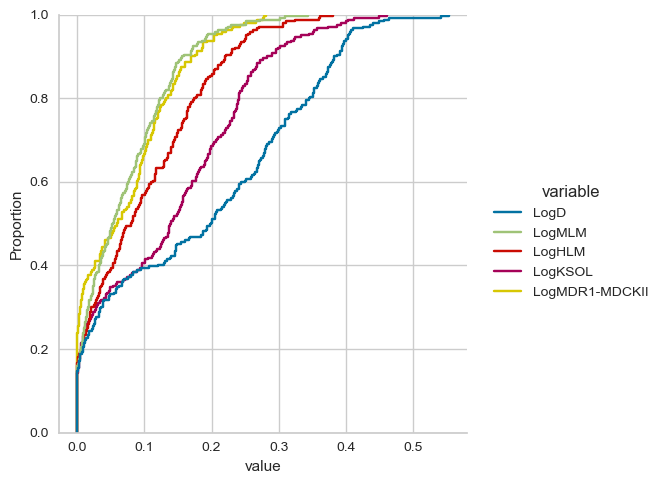

In [12]:
mi_coefs_m = mi_coefs.melt()
mi_coefs_m
sns.displot(data=mi_coefs_m, x='value', hue='variable', kind='ecdf', color=sns.color_palette('colorblind', 5))


In [13]:
features_by_target = {}
frac = 0.5
top_n = 20

for y_col in target_cols: 
    coefs = mi_coefs.loc[:, y_col]
    coefs = coefs.sort_values(ascending=False)
    features_by_target[y_col] = list(coefs.index)[:top_n]

features_by_target

{'LogD': ['Lipophilicity_AstraZeneca',
  'Chi1v',
  'SMR_VSA7',
  'BCUT2D_LOGPLOW',
  'BCUT2D_LOGPHI',
  'NumValenceElectrons',
  'Pgp_Broccatelli',
  'MaxAbsPartialCharge',
  'BCUT2D_CHGLO',
  'Chi0v',
  'MinPartialCharge',
  'PEOE_VSA6',
  'HeavyAtomMolWt',
  'PPBR_AZ',
  'Chi3v',
  'LabuteASA',
  'SlogP_VSA5',
  'ExactMolWt',
  'SMR_VSA9',
  'Chi1n'],
 'LogMLM': ['MaxPartialCharge',
  'BCUT2D_MRLOW',
  'MinAbsPartialCharge',
  'VSA_EState3',
  'HydrationFreeEnergy_FreeSolv',
  'BCUT2D_LOGPLOW',
  'MinEStateIndex',
  'EState_VSA8',
  'SlogP_VSA1',
  'SMR_VSA5',
  'EState_VSA10',
  'EState_VSA4',
  'MaxEStateIndex',
  'MaxAbsEStateIndex',
  'PAMPA_NCATS',
  'PEOE_VSA1',
  'SlogP_VSA5',
  'BCUT2D_CHGHI',
  'SlogP_VSA3',
  'SMR_VSA1'],
 'LogHLM': ['BCUT2D_MRHI',
  'MinAbsPartialCharge',
  'MaxPartialCharge',
  'BCUT2D_MWHI',
  'PEOE_VSA6',
  'SMR_VSA6',
  'BCUT2D_LOGPLOW',
  'VSA_EState1',
  'PEOE_VSA11',
  'BCUT2D_MRLOW',
  'VSA_EState5',
  'EState_VSA8',
  'BCUT2D_MWLOW',
  'SMR_VSA5'

In [14]:
feature_list = features_by_target.values()
feature_list = [y for x in feature_list for y in x]
feature_list = list(set(feature_list))
feature_list.sort()

df_all.loc[:, target_cols + feature_list + ['CXSMILES', 'Molecule Name', 'split']].to_csv('train_admet_features_2.csv', index=False)

In [15]:
feature_list

['BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BalabanJ',
 'Chi0v',
 'Chi1n',
 'Chi1v',
 'Chi3v',
 'Chi4v',
 'Clearance_Microsome_AZ',
 'EState_VSA1',
 'EState_VSA10',
 'EState_VSA4',
 'EState_VSA8',
 'ExactMolWt',
 'HeavyAtomMolWt',
 'HydrationFreeEnergy_FreeSolv',
 'LabuteASA',
 'Lipophilicity_AstraZeneca',
 'MaxAbsEStateIndex',
 'MaxAbsPartialCharge',
 'MaxEStateIndex',
 'MaxPartialCharge',
 'MinAbsPartialCharge',
 'MinEStateIndex',
 'MinPartialCharge',
 'MolMR',
 'NumHDonors',
 'NumHeteroatoms',
 'NumValenceElectrons',
 'PAMPA_NCATS',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA6',
 'PEOE_VSA8',
 'PPBR_AZ',
 'Pgp_Broccatelli',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA5',
 'SMR_VSA6',
 'SMR_VSA7',
 'SMR_VSA9',
 'SPS',
 'SlogP_VSA1',
 'SlogP_VSA3',
 'SlogP_VSA5',
 'SlogP_VSA6',
 'VSA_EState1',
 'VSA_EState3',
 'VSA_EState5',
 'qed']

## Feature Enginering

In [ ]:


# def pca_features(df, input_features, prefix, kernel=None, **kwargs): 
#     from sklearn.decomposition import PCA
#     from sklearn.decomposition import KernelPCA

    
#     if len(df.filter(regex=f"^{prefix}").columns) > 0:
#         return df, df.filter(regex=f"^{prefix}").columns
    
#     if kernel is None:
#         pca_train = PCA(**kwargs)
#         new_feature_names = [f"{prefix}_{x}" for x in input_features]

#     else: 
#         pca_train = KernelPCA(kernel=kernel,**kwargs)
#         new_feature_names = None
    
#     f_df = df.copy(deep=True)

#     X_train = f_df.loc[df.split == 'train', input_features].values
#     X_pca = pca_train.fit_transform(X_train)
#     if new_feature_names is None: 
#         new_feature_names = [f"{prefix}_{i}" for i in range(X_pca.shape[1])]
    

     
#     f_df.loc[f_df.split == 'train', new_feature_names] = X_pca

#     X_val = f_df.loc[f_df.split == 'val', input_features].values
#     X_pca_val = pca_train.transform(X_val)
#     f_df.loc[f_df.split == 'val', new_feature_names] = X_pca_val
#     return f_df, new_feature_names



# def pred_targ_plot(df, preds, targets=['LogMLM', "LogHLM", "LogKSOL", "LogD", "LogMDR1-MDCKII"]): 
#     id_var = ['Molecule Name']

#     df_m = df.loc[:, id_var+targets+preds].melt(id_vars=id_var+targets, 
#                                                     value_vars=preds, 
#                                                     var_name='predictor', 
#                                                     value_name='predictor_val')
#     df_m = df_m.melt(id_vars=id_var + ['predictor', 'predictor_val'], 
#                                 value_vars=targets, 
#                                 var_name='target', 
#                                 value_name='target_val'
#                                 )
#     assert df_m.shape[0] ==  df.shape[0]*len(preds)*len(targets)
#     if len(targets) > 1:
#         g = sns.relplot(data=df_m, x='predictor_val', y='target_val', 
#                 row='predictor', col='target', kind='scatter', 
#                 facet_kws={'sharex': 'row', 'sharey': 'row'})
#     else: 
#         g = sns.relplot(data=df_m, x='predictor_val', y='target_val', 
#         col='predictor', col_wrap=5, kind='scatter', 
#         facet_kws={'sharex': False, 'sharey': True})
#     return g

# def pred_pair_plot(df, preds): 
#     df_m = df.loc[:, preds]
#     g  = sns.pairplot(data=df_m, kind='hist', corner=True) 
#     return g



